In [5]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir configurações de exibição
pd.set_option('display.max_columns', None)


## Questão 1


## Carregamento de Dados

In [6]:
# Carregar os dados
august_total_sales = pd.read_csv("C:/Users/karin/Downloads/data_files_challenge (2)/august_total_sales.csv")
august_with_missing_order_days = pd.read_csv("C:/Users/karin/Downloads/data_files_challenge (2)/august_with_missing_order_days.csv")
historical_orders = pd.read_csv("C:/Users/karin/Downloads/data_files_challenge (2)/historical_orders.csv")

# Exibir uma amostra dos dados
print("Dados de total de vendas em agosto:")
display(august_total_sales.head())

print("Dados com dias de pedidos faltantes para agosto:")
display(august_with_missing_order_days.head())

print("Histórico de pedidos dos usuários:")
display(historical_orders.head())


Dados de total de vendas em agosto:


,account_id,total_transaction_amount_august
0,BR_00000343803,309.99
1,BR_00001415930,874.98
2,BR_00001760106,11976.70
3,BR_00002485176,511.48
4,BR_00002536340,7081.14


Dados com dias de pedidos faltantes para agosto:


,account_id,order_date,transaction_amount
0,BR_09532176632,2022-08-03,11.16
1,BR_09532176632,2022-08-03,32.52
2,BR_09532176632,2022-08-03,24.90
3,BR_09532176632,2022-08-03,28.50
4,BR_09532176632,2022-08-03,11.16


Histórico de pedidos dos usuários:


,account_id,order_date,transaction_amount,__index_level_0__
0,BR_09607801000194,2021-08-28,11011.2,0
1,BR_09607801000194,2021-08-28,13764.0,1
2,BR_09607801000194,2021-08-28,11011.2,2
3,BR_09607801000194,2021-08-28,11011.2,3
4,BR_09607801000194,2021-08-28,13764.0,4


## Análise Exploratória dos Dados

In [7]:
# Converter as colunas de datas para o tipo datetime
historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
august_with_missing_order_days['order_date'] = pd.to_datetime(august_with_missing_order_days['order_date'])

# Verificar a conversão
print("Tipos de dados após a conversão de datas:")
print(historical_orders.dtypes)
print(august_with_missing_order_days.dtypes)


Tipos de dados após a conversão de datas:
account_id                    object
order_date            datetime64[ns]
transaction_amount           float64
__index_level_0__              int64
dtype: object
account_id                    object
order_date            datetime64[ns]
transaction_amount           float64
dtype: object


## Análise dos Pedidos Históricos

In [8]:
# Agrupar os pedidos históricos por usuário e contar os dias únicos de pedidos
historical_order_days = historical_orders.groupby('account_id')['order_date'].nunique().reset_index()
historical_order_days.columns = ['account_id', 'historical_order_days']

# Exibir os dados de dias únicos de pedidos no histórico
print("Dias únicos de pedidos no histórico por usuário:")
display(historical_order_days.head())


Dias únicos de pedidos no histórico por usuário:


,account_id,historical_order_days
0,BR_00000343803,53
1,BR_00001415930,7
2,BR_00001545205,23
3,BR_00001760106,27
4,BR_00002485176,15


## Integração com os Dados de Agosto

In [9]:
# Unir o total de vendas previsto com os dias de pedidos históricos
august_data = pd.merge(august_total_sales, historical_order_days, on='account_id', how='left')

# Exibir o conjunto de dados combinado
print("Dados de agosto combinados com histórico:")
display(august_data.head())


Dados de agosto combinados com histórico:


,account_id,total_transaction_amount_august,historical_order_days
0,BR_00000343803,309.99,53.0
1,BR_00001415930,874.98,7.0
2,BR_00001760106,11976.70,27.0
3,BR_00002485176,511.48,15.0
4,BR_00002536340,7081.14,23.0


## Previsão dos Dias Restantes de Pedidos

In [10]:
# Contar o número de dias únicos de pedidos já feitos em agosto para cada usuário
august_known_days = august_with_missing_order_days.groupby('account_id')['order_date'].nunique().reset_index()
august_known_days.columns = ['account_id', 'known_order_days_august']

# Unir os dados de dias de pedidos já conhecidos em agosto com os dados combinados
august_data = pd.merge(august_data, august_known_days, on='account_id', how='left')

# Substituir os valores nulos de known_order_days_august por 0 (usuários sem pedidos conhecidos ainda)
august_data['known_order_days_august'].fillna(0, inplace=True)

# Calcular os dias restantes de pedidos previstos para agosto
# Exemplo simples: usamos a proporção de dias históricos e ajustamos pelo total de vendas
august_data['predicted_total_order_days_august'] = (august_data['historical_order_days'] *
                                                    august_data['total_transaction_amount_august'] /
                                                    august_data['total_transaction_amount_august'].mean())

# Subtrair os dias já conhecidos para obter a previsão de dias restantes
august_data['predicted_remaining_order_days'] = august_data['predicted_total_order_days_august'] - august_data['known_order_days_august']

# Assegurar que a previsão não tenha valores negativos
august_data['predicted_remaining_order_days'] = august_data['predicted_remaining_order_days'].apply(lambda x: max(x, 0))

# Exibir o resultado final
print("Previsão dos dias restantes de pedidos para cada usuário:")
display(august_data[['account_id', 'predicted_remaining_order_days']].head())


C:\Users\karin\AppData\Local\Temp\ipykernel_18416\2261885156.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  august_data['known_order_days_august'].fillna(0, inplace=True)


Previsão dos dias restantes de pedidos para cada usuário:


,account_id,predicted_remaining_order_days
0,BR_00000343803,2.561874
1,BR_00001415930,0.955059
2,BR_00001760106,50.423741
3,BR_00002485176,0.000000
4,BR_00002536340,24.395990


## Exportando os Resultados para CSV

In [11]:
# Preparar o arquivo final para exportação
final_predictions = august_data[['account_id', 'predicted_remaining_order_days']]
final_predictions.columns = ['account_id', 'prediction']

# Exportar para um arquivo CSV
final_predictions.to_csv('order_days_prediction.csv', index=False)

print("Arquivo CSV 'order_days_prediction.csv' gerado com sucesso!")


Arquivo CSV 'order_days_prediction.csv' gerado com sucesso!


## Questão 2

### Distribuição dos Dias de Pedidos

In [12]:
# Estimar lambda (média de dias de pedidos) com base nos pedidos históricos
lambda_estimate = historical_order_days['historical_order_days'].mean()

print(f"Estimativa de lambda (dias médios de pedidos): {lambda_estimate}")


Estimativa de lambda (dias médios de pedidos): 29.82074782354538


### Calcular a probabilidade de mais de 4 dias de pedidos

In [13]:
from scipy.stats import poisson

# Calcular a probabilidade de mais de 4 dias de pedidos
prob_more_than_4 = 1 - poisson.cdf(4, lambda_estimate)

print(f"Probabilidade de mais de 4 dias de pedidos: {prob_more_than_4}")


Probabilidade de mais de 4 dias de pedidos: 0.9999999957632586


### Estimar o tempo entre dias de pedidos

In [14]:
# Tempo esperado entre pedidos é o inverso de lambda
expected_time_between_orders = 1 / lambda_estimate

print(f"Tempo médio esperado entre dias de pedidos: {expected_time_between_orders} dias")


Tempo médio esperado entre dias de pedidos: 0.03353369962139032 dias


## Treinando um modelo de regressão para prever os dias de pedidos

### Remover Valores Nulos

In [16]:
# Remover linhas com valores nulos em y (dias de pedidos restantes)
august_data_clean = august_data.dropna(subset=['predicted_remaining_order_days'])

# Preparar os dados: Excluir colunas desnecessárias e lidar com valores ausentes
X = august_data_clean[['total_transaction_amount_august', 'historical_order_days']]  # Features
y = august_data_clean['predicted_remaining_order_days']  # Target

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Após remover NaN): {mse}")


Mean Squared Error (Após remover NaN): 966751.7781377984


### Preencher os Valores Nulos com a Média

In [17]:
# Preencher os valores nulos de 'predicted_remaining_order_days' com a média
august_data['predicted_remaining_order_days'].fillna(august_data['predicted_remaining_order_days'].mean(), inplace=True)

# Preparar os dados: Excluir colunas desnecessárias e lidar com valores ausentes
X = august_data[['total_transaction_amount_august', 'historical_order_days']]  # Features
y = august_data['predicted_remaining_order_days']  # Target

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Após preencher NaN com a média): {mse}")


C:\Users\karin\AppData\Local\Temp\ipykernel_18416\1260939707.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  august_data['predicted_remaining_order_days'].fillna(august_data['predicted_remaining_order_days'].mean(), inplace=True)


Mean Squared Error (Após preencher NaN com a média): 709995.6443089595


### Adicionar mais Features

In [18]:
# Adicionar mais features para o modelo
X = august_data[['total_transaction_amount_august', 'historical_order_days', 'known_order_days_august']]  # Features

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error com mais features: {mse}")


Mean Squared Error com mais features: 929751.172867732


### Remover Linhas com NaN

In [20]:
# Remover linhas com valores nulos em X (features)
X_clean = X.dropna()

# Também precisamos remover os valores correspondentes de y
y_clean = y[X_clean.index]

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error com Regressão Linear (sem NaN): {mse}")


Mean Squared Error com Regressão Linear (sem NaN): 1868173.1096264252


### Preencher os Valores Faltantes com a Média

In [21]:
# Preencher os valores faltantes com a média de cada coluna
X_filled = X.fillna(X.mean())

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error com Regressão Linear (preenchendo NaN): {mse}")


Mean Squared Error com Regressão Linear (preenchendo NaN): 1175225.8966954886


## Visualizar os Resultados

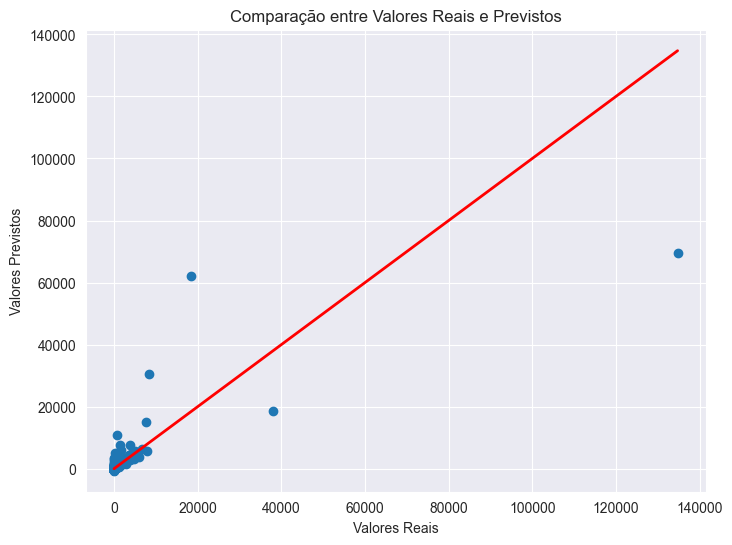

In [22]:
import matplotlib.pyplot as plt

# Comparar valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()


### Avaliar o Modelo com Métricas Diferentes

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calcular o R²
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


R²: 0.6228884268793385
Mean Absolute Error (MAE): 164.35044798661087


### Ajustar Hiperparâmetros

In [24]:
# Random Forest com ajuste de hiperparâmetros
model_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = model_rf.predict(X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error com Random Forest (ajustado): {mse_rf}")


Mean Squared Error com Random Forest (ajustado): 912220.2724785159


### previsões do Random Forest

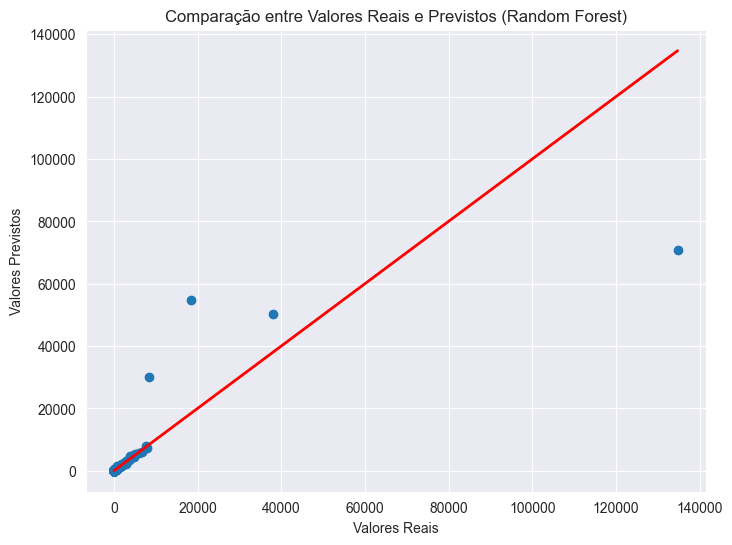

In [25]:
import matplotlib.pyplot as plt

# Comparar valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos (Random Forest)')
plt.show()


### ajuste de hiperparâmetros mais avançado usando o GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para ajuste
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Fazer a busca em grade
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error com Random Forest (melhor modelo): {mse_best}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits


### Gerar o Gráfico de Comparação (Valores Reais vs Previstos): Após o ajuste do modelo, podemos gerar o gráfico para comparar os valores reais e previstos usando o melhor modelo encontrado.

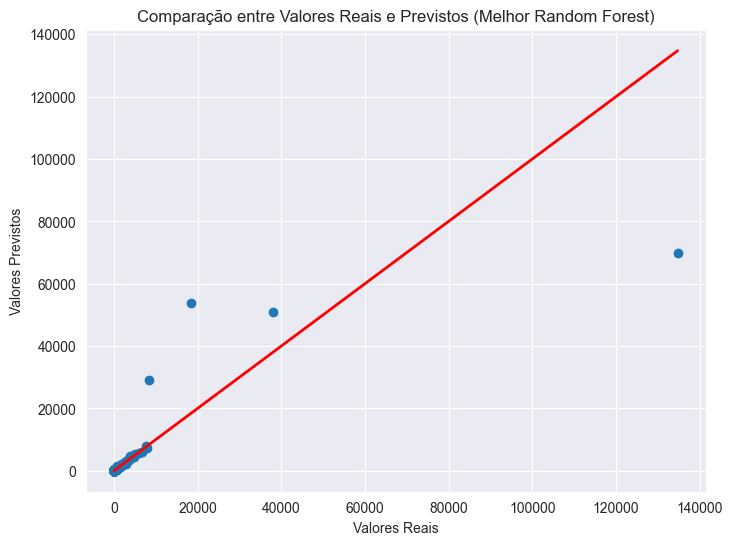

In [28]:
import matplotlib.pyplot as plt

# Comparar valores reais e previstos do melhor modelo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos (Melhor Random Forest)')
plt.show()
